# Data Visualization
## Use the Pandas to find out the relationships:
1. For aggregation, use groupby (split-apply-combine)
    - Mydf.groupby(['col1','col2']) shall return a groupby object that has the after-split structure
    - Use built-in dataframe aggregation functions, such as .size(), .count(), .median(), .quantile(0.95)
    - You can use .agg({'col3':'sum', 'col4',['count', lambda x: x.quantile]}) to fine tune the aggregation functions
    - Use list comprehension to fully customize it. e.g adding a filter before aggregation
        for name, groupdf in mydf.groupby('State'):
            print(groupdf[groupdf['DepDelay'] < groupdf.quantile(0.95)].median())
2. Want to see the data distribution ( see column ): use value_count()
3. Want to see the pivot table view ( 2 columns ): try df.crosstable(df.state, df.cancellationcode, margins=True)
    

In [1]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible

In [4]:
df=pd.read_csv('data/telecom-churn.csv')

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


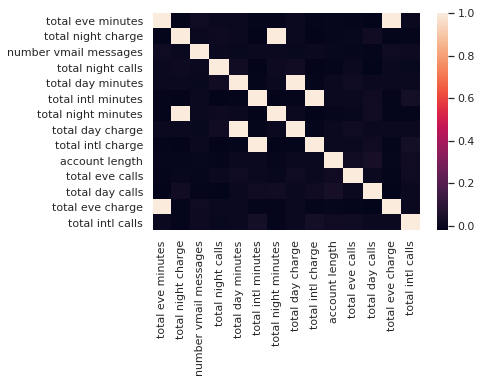

In [7]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

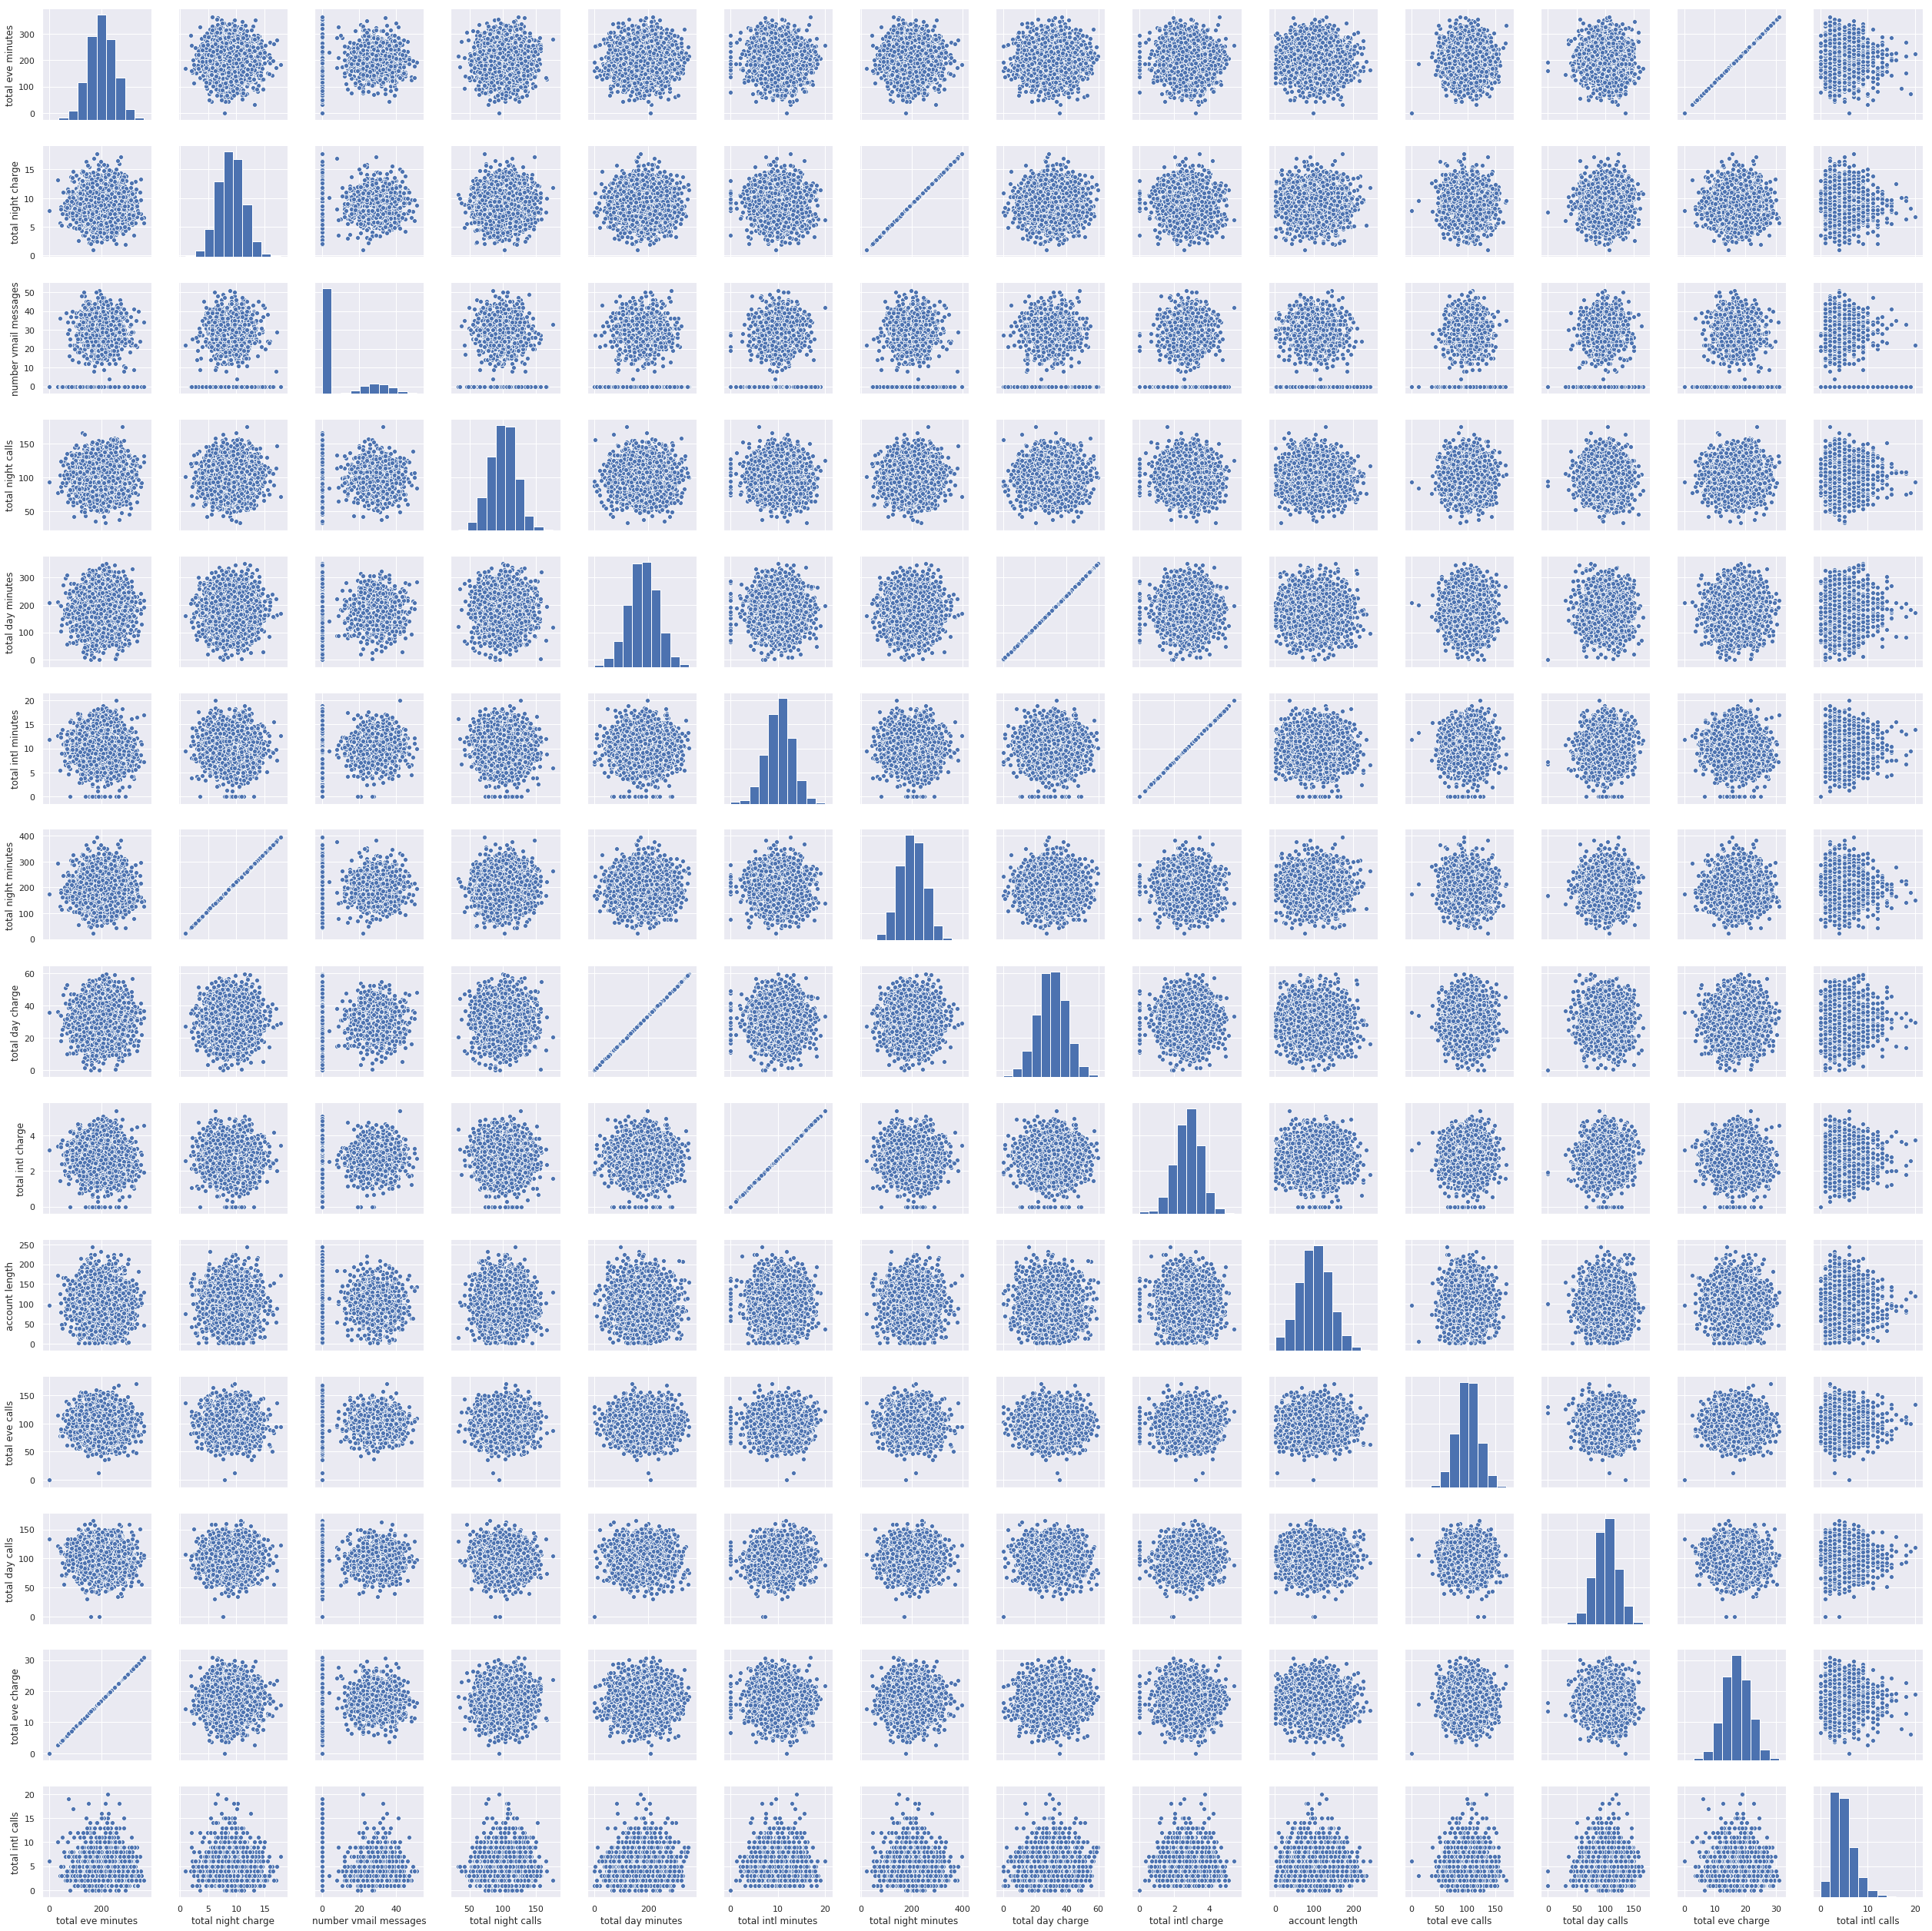

In [8]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [ ]:
%config InlineBackend.figure_format = 'svg'